In [78]:
# IMPORTS
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# LOAD FUNCTIONS
%run ../src/useful_functions-2-copy.ipynb

In [79]:
df_ = df_t.copy()
att_name = 'Codi_Districte_Educatiu'

def sat_dataprep(df_, att_name):
    cols = [att_name, 'SLSSmc']
    df_sat = df_[cols].copy()
    df_sat = df_sat.dropna()

    lab = list(df_sat['SLSSmc'].unique())
    lab_new= ['Very','Fairly', 'Slightly', 'Not at all', 'NC']

    df_sat['Satisf'] = pd.Categorical(df_sat['SLSSmc'].replace(lab,lab_new),
         categories = lab_new, ordered=True)
    df_sat.pop('SLSSmc')  

    att_ = np.sort(df_sat[att_name].unique())
    levels = df_sat['Satisf'].unique()

    mtrx = []
    for att in att_:
        df_att = df_sat.loc[df_sat[att_name]==att].value_counts(normalize=True)*100
        df_att= df_att.reset_index().rename(columns={0: 'Ratio'})
        mtrx.append(list(df_att['Ratio']))
    
    return(mtrx,lab_new, att_)

In [80]:
def m_att_resize(m,lev,att):
    m_ = m.copy()
    att_ = att.copy()
    # print("att", len(att))
    for i in range(len(m)):
        # print(i, m[i], len(lev)>len(m[i]))
        if len(lev)>len(m[i]):
            m_.remove(m[i])
            j, = np.where(att_ == att[i]) 
            att_ = np.delete(att_, j)

    return(m_,att_)

In [81]:
def s_bar_plot(mtrx, level, attr, attr_label='', fig_tup=(16, 10), title = False): 
    plt.figure(figsize=fig_tup)
    axes = []

    # Aggregating each feeling level:
    cum_size = np.zeros(len(attr))
    i=0
    for lev_, lev_data in zip(level, np.transpose(mtrx)):
        axes.append(plt.barh(attr, lev_data, left=cum_size,
                                label=lev_, color=colors2[i]))
        cum_size += lev_data
        i +=1

    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks(np.arange(0,101,20))
    ax.legend(bbox_to_anchor=(0.5,0.95), loc="lower center", ncol=len(level), frameon=False, fontsize='medium')
    plt.tick_params(labelsize=14, pad=6)

    plt.ylabel(attr_label, fontsize=16)
    plt.xlabel("Ratio of answers per level", fontsize=16)
    if title:
        plt.title("To what extent are you satisfied with your life?", fontsize=22, y=1.03)

    plt.tight_layout()
    # plt.savefig('f_sbar.png', bbox_inches='tight')
    plt.show()

In [17]:
df_ = df_t.copy()
att_name = 'Nom_Districte_Educatiu'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)

[[62.299465240641716, 21.65775401069519, 8.02139037433155, 4.27807486631016, 3.7433155080213902], [68.43657817109144, 23.893805309734514, 4.129793510324483, 2.949852507374631, 0.5899705014749262], [68.36734693877551, 23.72448979591837, 5.357142857142857, 2.0408163265306123, 0.5102040816326531], [69.17098445595855, 21.502590673575128, 6.476683937823833, 2.072538860103627, 0.7772020725388601], [68.01007556675063, 24.181360201511335, 4.785894206549118, 2.770780856423174, 0.2518891687657431], [69.61325966850829, 23.204419889502763, 4.972375690607735, 1.9337016574585635, 0.2762430939226519], [64.26426426426426, 24.924924924924923, 6.906906906906906, 2.7027027027027026, 1.2012012012012012], [67.99007444168734, 22.8287841191067, 5.459057071960298, 3.225806451612903, 0.49627791563275436], [67.80104712041884, 24.083769633507853, 5.2356020942408374, 2.356020942408377, 0.5235602094240838], [75.08417508417509, 18.68686868686869, 4.208754208754209, 1.3468013468013467, 0.6734006734006733]]


In [50]:
dict(zip(lev, colors2_hex))

{'Very': '#FFCA3A',
 'Fairly': '#DAAB50',
 'Slightly': '#A3798B',
 'Not at all': '#7D5C9B',
 'NC': '#4D376C'}

In [40]:
data = []

for i, att in enumerate(att_):
    item = {}
    item['district'] = att
    
    for y, l in enumerate(lev):
        item[l] = round(m_[i][y], 2)
    
    data.append(item)

In [42]:
with open('../data/satifaction-1.json', 'w') as outfile:
    json.dump(data, outfile)

In [51]:
# s_bar_plot(m_,lev,att_, title=True)

In [ ]:
# Plot 2

In [52]:
att_name = 'ERFDbllp'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)

# Removing the neighbourhoods outside BCN
# s_plot = s_bar_plot(m_[:3],lev,att_[:3], fig_tup=(16, 6))

In [53]:
data = []

for i, att in enumerate(att_[:3]):
    item = {}
    item['district'] = att
    
    for y, l in enumerate(lev):
        item[l] = round(m_[i][y], 2)
    
    data.append(item)

In [54]:
with open('../data/satifaction-2.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
# Plot 3

In [93]:
# How often are you concerned about the money your family has?
att_name = 'preocupacio_diners'
attr_label = 'Freq. Money Concerns'
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(np.append(att_[0], att_[3:]), att_[1:3][::-1])
m_ = [m_[0]] + m_[3:] + m_[1:3][::-1]
# s_bar_plot(m_[::-1],lev,att_[::-1],fig_tup=(16, 6), attr_label=attr_label)

In [94]:
data = []

for i, att in enumerate(att_):
    item = {}
    item['concern'] = att
    
    for y, l in enumerate(lev):
        item[l] = round(m_[i][y], 2)
    
    data.append(item)

In [95]:
data.reverse()

with open('../data/satifaction-3-bis.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
# Plot 4

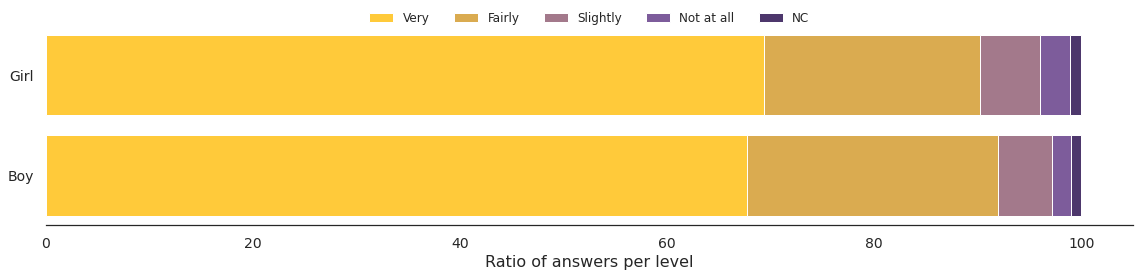

In [64]:
df_ = df_t.copy()
att_name = 'Sexe'
m,lev,att = sat_dataprep(df_, att_name) 
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 4))

In [65]:
data = []

for i, att in enumerate(att_):
    item = {}
    item['concern'] = att
    
    for y, l in enumerate(lev):
        item[l] = round(m_[i][y], 2)
    
    data.append(item)

In [66]:
data

[{'concern': 'Boy',
  'Very': 67.69,
  'Fairly': 24.28,
  'Slightly': 5.22,
  'Not at all': 1.81,
  'NC': 1.0},
 {'concern': 'Girl',
  'Very': 69.35,
  'Fairly': 20.84,
  'Slightly': 5.8,
  'Not at all': 2.93,
  'NC': 1.08}]

In [67]:
with open('../data/gender.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
# Plot 5

In [70]:
att_name = 'Edat'
m,lev,att = sat_dataprep(df_, att_name) 

m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6), attr_label="Age")

In [71]:
data = []

for i, att in enumerate(att_):
    item = {}
    item['concern'] = att
    
    for y, l in enumerate(lev):
        item[l] = round(m_[i][y], 2)
    
    data.append(item)

In [73]:
with open('../data/age.json', 'w') as outfile:
    json.dump(data, outfile)

In [74]:
att_name = 'dificultat_aprenentatge'
attr_label="Learning Difficulties"
m,lev,att = sat_dataprep(df_, att_name)
m_, att_ = m_att_resize(m,lev,att)
# s_bar_plot(m_,lev,att_, fig_tup=(16, 6))

att_ = np.append(att_[0], att_[2:])
m_ = [m_[0]]+m_[2:]
# s_bar_plot(m_,lev,att_,fig_tup=(16, 6), attr_label=attr_label)

In [75]:
data = []

for i, att in enumerate(att_):
    item = {}
    item['concern'] = att
    
    for y, l in enumerate(lev):
        item[l] = round(m_[i][y], 2)
    
    data.append(item)

In [77]:
with open('../data/learning.json', 'w') as outfile:
    json.dump(data, outfile)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>